In [22]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [23]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,...,x6_None,x6_copper bromide,x6_oleic acid,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 79
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,0.865472,...,1,0,0,0,0,0,1.750,480.0,539.000000,59.000000
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.675365,...,1,0,0,0,0,0,2.610,610.0,622.333333,12.333333
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,...,1,0,0,0,0,0,3.700,560.0,595.000000,35.000000
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,0.457150,...,1,0,0,0,0,0,4.300,590.0,635.000000,45.000000
4,4,4,4,4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,0.865472,...,1,0,0,0,0,0,2.000,429.5,500.000000,70.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.675365,...,1,0,0,0,0,0,4.000,585.0,630.000000,45.000000
203,203,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.675365,...,1,0,0,0,0,0,2.000,465.0,550.000000,85.000000
204,204,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.675365,...,1,0,0,0,0,0,2.100,465.0,578.333333,113.333333
205,205,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.675365,...,1,0,0,0,0,0,2.584,495.0,578.333333,83.333333


In [24]:
# Input for ML models


input_col =  ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 
       'x5_None', 'x5_acetic acid', 'x5_superhydride',
       'x5_tetrabutylammonium myristate', 'x5_zinc acetate', 'x5_zinc bromide',
       'x5_zinc chloride', 'x5_zinc iodide', 'x5_zinc octanoate',
       'x5_zinc oleate', 'x5_zinc stearate', 'x5_zinc undecylenate', 'x6_None',
       'x6_copper bromide', 'x6_oleic acid','x6_trioctylphosphine',  'x6_water', 'x6_zinc iodide']

output_col = ['diameter_nm', 'abs_nm', 'emission_nm']

X = df[input_col]

Y = df[output_col]

In [25]:
# Splitting dataset for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

In [26]:
Y.shape

(207, 3)

In [27]:
X.shape

(207, 73)

In [7]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(Y_test.iloc[:, column], Y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  0.797406458353295 
 R^2 for Absorbance is  0.5617801538741136 
 R^2 for PL is  0.7494623710631536 
 

K-nn 

 R^2 for diameter is  0.28736888250300074 
 R^2 for Absorbance is  0.16741726994608375 
 R^2 for PL is  0.22642567134303837 
 

Linear regression 

 R^2 for diameter is  -9.175740441792414e+21 
 R^2 for Absorbance is  -1.0734914159112385e+24 
 R^2 for PL is  -4.465399865799347e+23 
 

Ridge 

 R^2 for diameter is  0.42361370242742247 
 R^2 for Absorbance is  0.4120519355864469 
 R^2 for PL is  0.5174001632078353 
 

Lasso 

 R^2 for diameter is  -0.020003438746903912 
 R^2 for Absorbance is  0.39412267406698664 
 R^2 for PL is  0.45070721772285793 
 

ElasticNet 

 R^2 for diameter is  -0.020003438746903912 
 R^2 for Absorbance is  0.09395082264982335 
 R^2 for PL is  0.15070502883277348 
 

RandomForestRegressor 

 R^2 for diameter is  0.16923826441098022 
 R^2 for Absorbance is  0.44663862300210877 
 R^2 for PL is  0.5282308335940099 
 

Dec

## Optimizing


### 1. Extra Trees

In [28]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 40, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, Y_train)
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [06:51<00:00, 17.14s/it]

10.286983135367063 7 23 15


In [12]:

ET_regr = ExtraTreesRegressor(n_estimators=12,
                            max_features=20,     
                            random_state=2).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.8541450358820359 ; MSE: 0.48304288754480307 ; RMSE: 0.6950128686181307 ; MAE: 0.5461827956989248
absorbance:  r2: 0.6849426180262271 ; MSE: 606.1113911290319 ; RMSE: 24.619329623875462 ; MAE: 18.517473118279565
emission:  r2: 0.8240707145827165 ; MSE: 226.903051673307 ; RMSE: 15.06330148650378 ; MAE: 10.359318992921148


### 2. Decision Tree 

In [29]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 40, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:17<00:00,  1.11it/s]

8.970145831597227 19 18 20


In [30]:
DT_regr = DecisionTreeRegressor(max_depth=18,
                                max_features=1,
                                random_state=15)
            
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    DT_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE )

diameter:  r2: 0.35059287628738856 ; MSE: 0.49508787500000007 ; RMSE: 0.7036248112453114 ; MAE: 0.4734791666666667
absorbance:  r2: 0.32449183754297883 ; MSE: 2422.1953125 ; RMSE: 49.21580348323087 ; MAE: 34.421875
emission:  r2: 0.4509068984599225 ; MSE: 1392.159722792361 ; RMSE: 37.31165666105381 ; MAE: 22.854166668749997


### 3. Random Forest

In [32]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 27)):
    for j in range(1, 27):
        for k in range(2, 48, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, Y_train)
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [05:44<00:00, 13.24s/it]

10.991766975752311 20 6 12


In [31]:
RF_regr = RandomForestRegressor(max_depth=14, 
                                n_estimators=8, 
                                max_features=20,
                                random_state=45)
            
RF_regr.fit(X_train, Y_train)            
RF_Y_pred = RF_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    RF_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE )

diameter:  r2: 0.2382527141514139 ; MSE: 0.17923728055717011 ; RMSE: 0.42336424099960324 ; MAE: 0.33303858015602905
absorbance:  r2: 0.8504086062401859 ; MSE: 321.3291820878051 ; RMSE: 17.92565708942925 ; MAE: 14.171117424242423
emission:  r2: 0.7097117794326309 ; MSE: 431.25887123184975 ; RMSE: 20.76677325035957 ; MAE: 16.342582070707067


### 4. K Neighbors

In [11]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, Y_train)

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:20<00:00,  1.86it/s]

17.050483872401433 3 1


In [33]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=5).fit(X_train, Y_train)

KNN_Y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.06897807678515755 ; MSE: 0.21906719033496447 ; RMSE: 0.468046141245673 ; MAE: 0.33632996621212125
Abs: r2: 0.7070064320530501 ; MSE: 629.3636363636364 ; RMSE: 25.087120926157237 ; MAE: 18.515151515151516
PL: r2: 0.5597857580167673 ; MSE: 653.9924242424242 ; RMSE: 25.57327558687827 ; MAE: 17.53030303030303


### 5. Lasso

In [54]:
min_mae = 9999

min_i, min_j = 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, Y_train)
        
        L_Y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(Y_test, pd.DataFrame(L_Y_pred))
      
        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

            
print(min_mae, min_i, min_j)

  0%|          | 0/95 [00:00<?, ?it/s]/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

18.478823529411766 0.1 1


### Saving Extra Trees model

In [33]:
DT_regr = DecisionTreeRegressor(max_depth=19,
                                max_features=18,
                                random_state=20).fit(X_train, Y_train)

DT_Y_pred = DT_regr.predict(X_test)

joblib.dump(DT_regr, "./model_MO_DecisionTree.joblib")

['./model_MO_DecisionTree.joblib']

## Analyzing

In [35]:
DT_regr = DecisionTreeRegressor(max_depth=19,
                                max_features=18,
                                random_state=20).fit(X_train, Y_train)
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.60785122611882 ; MAE: 0.3744609375000002 ; MSE: 0.2989620779562116 ; RMSE: 0.5467742477075997
absorbance:  r2: 0.6494993779421295 ; MAE: 24.74609375 ; MSE: 1256.8034125434033 ; RMSE: 35.45142327951592
emission:  r2: 0.7692586983227481 ; MAE: 16.26540798346356 ; MSE: 585.0169045627783 ; RMSE: 24.187122701197396


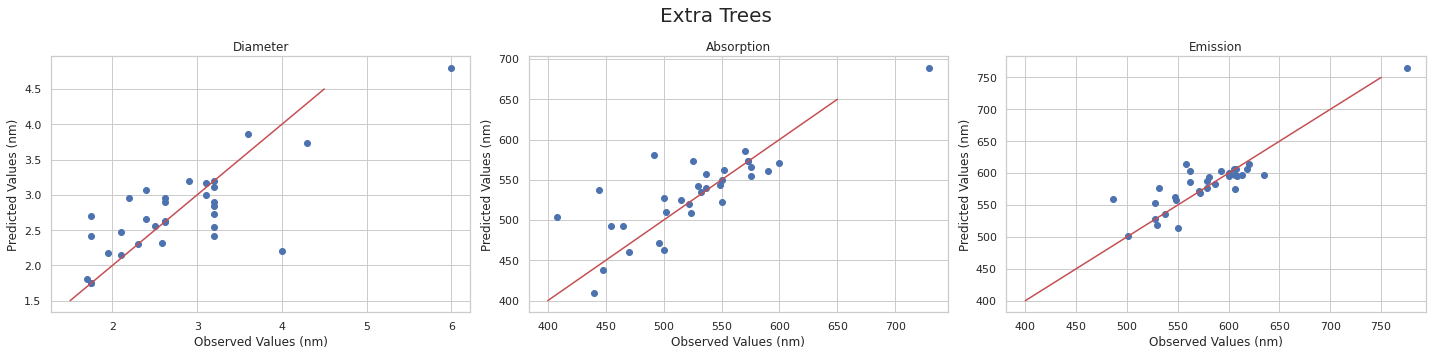

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1.5,4.5],[1.5,4.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,750],[400,750], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

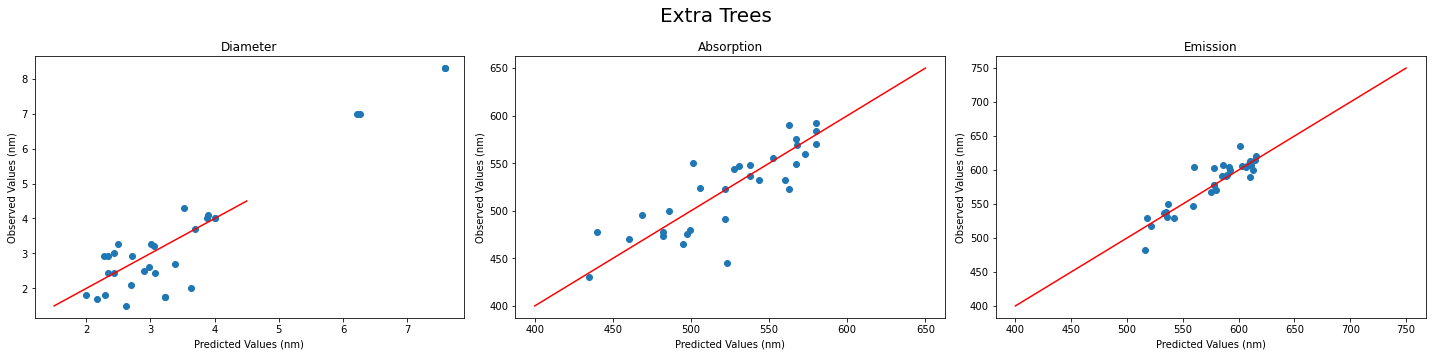

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(pd.DataFrame(ET_Y_pred).loc[:, 0], Y_test.iloc[:, 0], 'o')
ax1.plot([1.5,4.5],[1.5,4.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax2.plot(pd.DataFrame(ET_Y_pred).loc[:, 1],Y_test.iloc[:, 1], 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax3.plot(pd.DataFrame(ET_Y_pred).loc[:, 2], Y_test.iloc[:, 2], 'o')
ax3.plot([400,750],[400,750], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')
fig.tight_layout()

In [37]:
importance_dict = dict()
for i in range(0,71):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('temp_c', 0.11198884616449613),
 ('x4_trioctylphosphine oxide', 0.08883890953136711),
 ('time_min', 0.08486043278583226),
 ('x5_zinc iodide', 0.06551321237934196),
 ('x5_None', 0.05106658661401793),
 ('x5_zinc oleate', 0.04190058530739046),
 ('x5_zinc chloride', 0.032305374259322145),
 ('x4_octylamine', 0.03177062062914178),
 ('x6_None', 0.031185467912074417),
 ('x3_trioctylphosphine', 0.029100047597962333),
 ('other_1_amount_mmol', 0.02402779617379543),
 ('ligand_amount_mmol', 0.022542080689582737),
 ('x2_stearic acid', 0.022051001379484743),
 ('in_amount_mmol', 0.022035840196291814),
 ('second_sol_amount_ml', 0.020858291985492865),
 ('p_amount_mmol', 0.020347654428997535),
 ('total_volume_ml', 0.020205965418675916),
 ('x5_zinc octanoate', 0.017053014425854003),
 ('x0_indium iodide', 0.01619531226627964),
 ('first_sol_amount_ml', 0.015621218114511918),
 ('x2_dodecanethiol', 0.015066975044423772),
 ('x4_None', 0.013399058554398038),
 ('x0_indium chloride', 0.012771286309765107),
 ('x

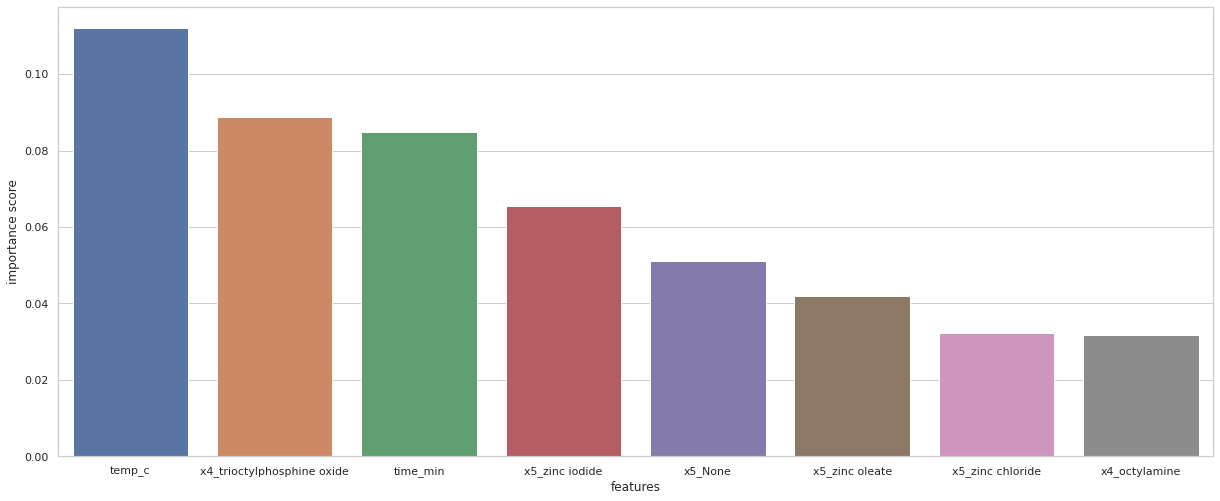

In [38]:
top7 = DataFrame(sorted_importance[0:8], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[8:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)

In [39]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso